In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
teams = {
    'TBL20': pd.read_csv('TBL20.csv'),
    'TBL21': pd.read_csv('TBL21.csv'),
    'COL22': pd.read_csv('COL22.csv'),
    'VGK23': pd.read_csv('VGK23.csv'),
    'FLA24': pd.read_csv('FLA24.csv')
}

third_line_players = pd.read_csv('3rdlineplayers.csv')
first_line_players = pd.read_csv('1stlineplayers.csv')

In [18]:
for team_name, team_data in teams.items():
    print(f"Data for {team_name}:")
    print(team_data.head())
    print("\n")
    
print(third_line_players.head())

Data for TBL20:
    Rk                 Player   Age Pos  GP   G   A  PTS  +/-  PIM  ...  \
0  1.0  Nikita Kucherov ('20)  26.0  RW  25   7  27   34   15   22  ...   
1  2.0    Brayden Point ('20)  23.0   C  23  14  19   33   12   10  ...   
2  3.0          Victor Hedman  29.0   D  25  10  12   22   13   24  ...   
3  4.0     Ondřej Palát ('20)  28.0  LW  25  11   7   18   14   10  ...   
4  5.0     Yanni Gourde ('20)  28.0   C  25   7   7   14   12   19  ...   

       ATOI  FOW  FOL   FO%  BLK  HIT  TAKE  GIVE    Awards      -9999  
0     21:40    0    2   0.0    7   39     9    30       NaN  kucheni01  
1     20:32  213  156  57.7   13   21    15     9       NaN  pointbr01  
2  26:28:00    0    0   NaN   45   36    12    38  Smythe-1  hedmavi01  
3     20:55    7   16  30.4   22   76    15    16       NaN  palaton01  
4     18:19  127  166  43.3    8   49    16    10       NaN  gourdya01  

[5 rows x 31 columns]


Data for TBL21:
    Rk                 Player   Age Pos  GP   G   A  P

In [19]:
team_columns_to_keep = ['Player', 'GP', 'G', 'A', 'PTS', 'TOI', 'HIT', 'BLK']
for team_name in teams.keys():
    teams[team_name] = teams[team_name][team_columns_to_keep]
    
third_line_players = third_line_players[team_columns_to_keep]
first_line_players = first_line_players[team_columns_to_keep]

In [27]:

third_line_contributions = {}

for team_name, team_data in teams.items():
    team_contrib = third_line_players[third_line_players['Player'].isin(team_data['Player'])]
    total_stats = team_contrib[['G', 'A', 'PTS', 'TOI', 'HIT', 'BLK']].sum().to_dict()
    third_line_contributions[team_name] = total_stats
    
third_line_contributions_df = pd.DataFrame(third_line_contributions).T

In [28]:
first_line_contributions = {}

for team_name, team_data in teams.items():
    team_contrib = first_line_players[first_line_players['Player'].isin(team_data['Player'])]
    total_stats = team_contrib[['G', 'A', 'PTS','TOI', 'HIT', 'BLK']].sum().to_dict()
    first_line_contributions[team_name] = total_stats
    
first_line_contributions_df = pd.DataFrame(first_line_contributions).T

<Axes: >

Text(0.5, 1.0, '3rd Line Player Contributions to Stanley Cup Winning Teams (2020-2024)')

Text(0, 0.5, 'Total Contributions')

Text(0.5, 0, 'Stanley Cup Winning Teams')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TBL20'),
  Text(1, 0, 'TBL21'),
  Text(2, 0, 'COL22'),
  Text(3, 0, 'VGK23'),
  Text(4, 0, 'FLA24')])

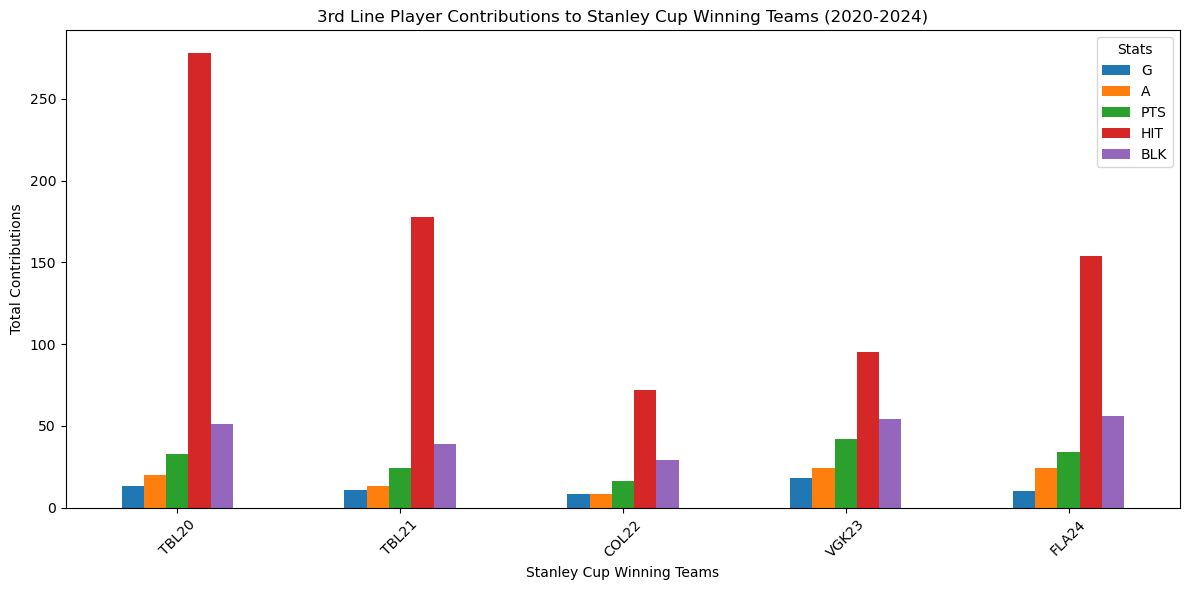

In [29]:
third_line_contributions_df.plot(kind='bar', figsize=(12, 6))
plt.title('3rd Line Player Contributions to Stanley Cup Winning Teams (2020-2024)')
plt.ylabel('Total Contributions')
plt.xlabel('Stanley Cup Winning Teams')
plt.xticks(rotation=45)
plt.legend(title='Stats')
plt.tight_layout()
plt.show()

<Axes: >

Text(0.5, 1.0, 'Contributions of Different Lines to Stanley Cup Winning Teams (Goals)')

Text(0, 0.5, 'Goals')

Text(0.5, 0, 'Stanley Cup Winning Teams')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TBL20'),
  Text(1, 0, 'TBL21'),
  Text(2, 0, 'COL22'),
  Text(3, 0, 'VGK23'),
  Text(4, 0, 'FLA24')])

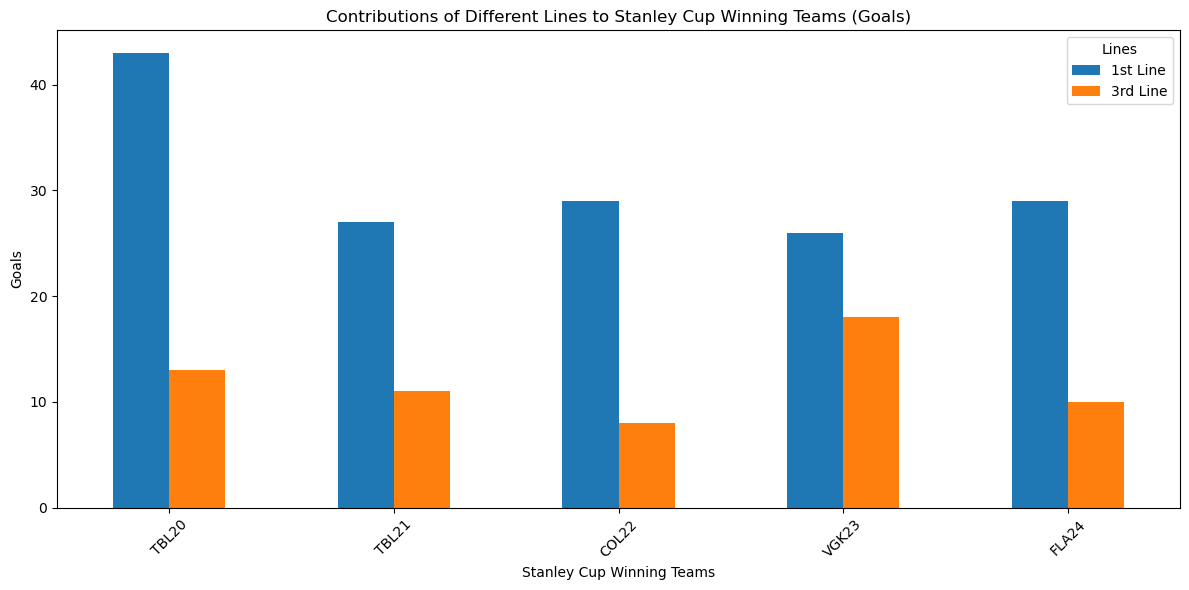

In [30]:
line_contributions = {
    '1st Line': first_line_contributions_df['G'].values,
    '3rd Line': third_line_contributions_df['G'].values
}
line_contributions_df = pd.DataFrame(line_contributions, index=third_line_contributions_df.index)

line_contributions_df.plot(kind='bar', figsize=(12, 6))
plt.title('Contributions of Different Lines to Stanley Cup Winning Teams (Goals)')
plt.ylabel('Goals')
plt.xlabel('Stanley Cup Winning Teams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Lines')
plt.show()

<Axes: >

Text(0.5, 1.0, '1st Line vs 3rd Line Scoring')

Text(0, 0.5, 'Value')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TBL20'),
  Text(1, 0, 'TBL21'),
  Text(2, 0, 'COL22'),
  Text(3, 0, 'VGK23'),
  Text(4, 0, 'FLA24')])

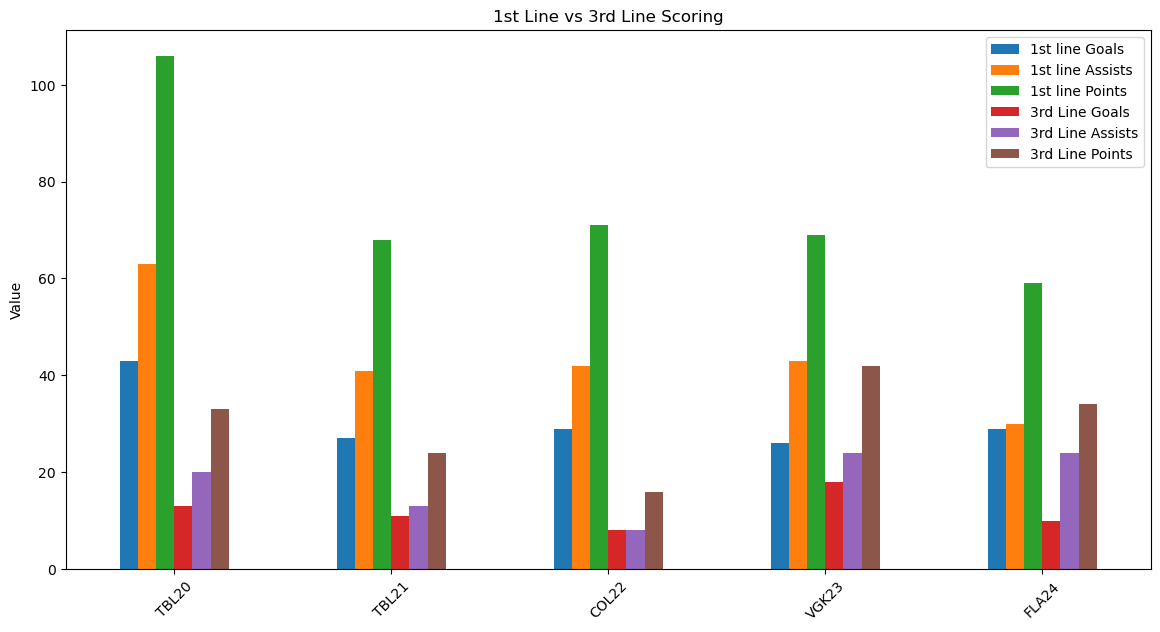

In [36]:

comparison_df = first_line_contributions_df[['G', 'A', 'PTS']].rename(columns={"G": "1st Line Goals", "A": "1st Line Assists", "PTS": "1st Line Points"})
comparison_df[['3rd Line Goals', '3rd Line Assists', '3rd Line Points']] = third_line_contributions_df[['G', 'A', 'PTS']]

comparison_df.plot(kind='bar', figsize=(14, 7))
plt.title('1st Line vs 3rd Line Scoring')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['1st line Goals', '1st line Assists', '1st line Points', '3rd Line Goals', '3rd Line Assists', '3rd Line Points'])
plt.show()

<Axes: >

Text(0.5, 1.0, '1st Line vs 3rd Line Defensive Contributions')

Text(0, 0.5, 'Total Hits & Blocks')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TBL20'),
  Text(1, 0, 'TBL21'),
  Text(2, 0, 'COL22'),
  Text(3, 0, 'VGK23'),
  Text(4, 0, 'FLA24')])

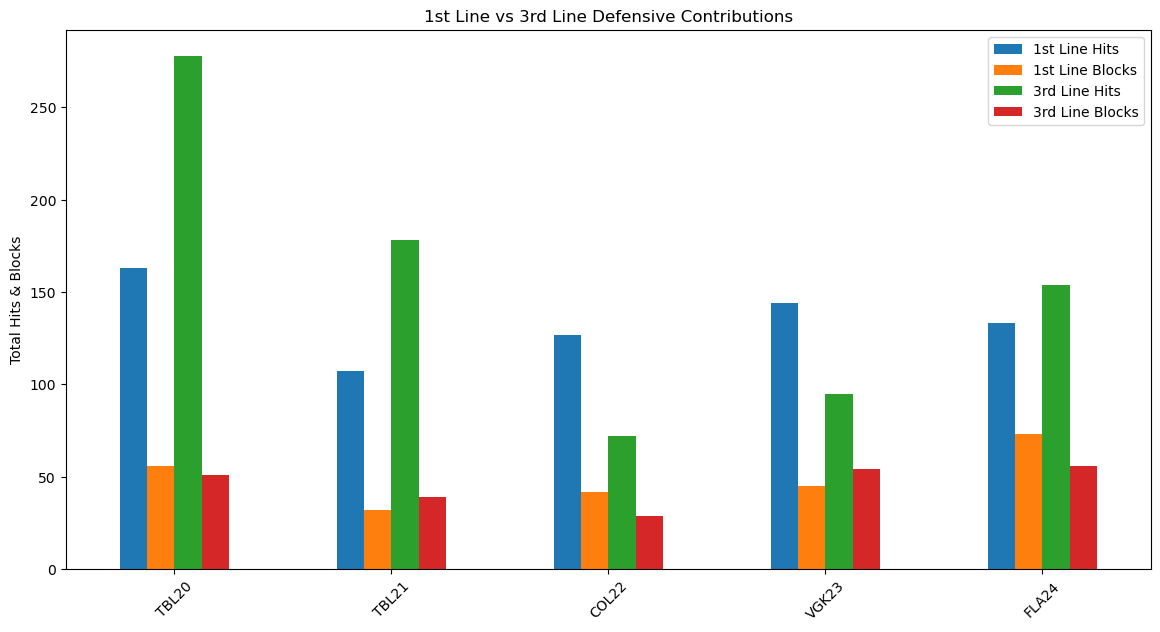

In [35]:

hits_blocks_comparison = first_line_contributions_df[['HIT', 'BLK']].rename(columns={"HIT": "1st Line Hits", "BLK": "1st Line Blocks"})
hits_blocks_comparison[['3rd Line Hits', '3rd Line Blocks']] = third_line_contributions_df[['HIT', 'BLK']]

hits_blocks_comparison.plot(kind='bar', figsize=(14, 7))
plt.title('1st Line vs 3rd Line Defensive Contributions')
plt.ylabel('Total Hits & Blocks')
plt.xticks(rotation=45)
plt.legend(['1st Line Hits', '1st Line Blocks', '3rd Line Hits', '3rd Line Blocks'])
plt.show()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
sns.set(style="whitegrid")

In [43]:
cup_winners = pd.read_csv('3rdlineplayers.csv')
contenders = pd.read_csv('Contenders3rdline.csv')

In [44]:
print(cup_winners.head())
print(contenders.head())

# Check for missing values
print(cup_winners.info())
print(contenders.info())

   Rk                 Player  Age Pos  GP  G  A  PTS  +/-  PIM  ...   ATOI  \
0   5     Yanni Gourde ('20)   28   C  25  7  7   14   12   19  ...  18:19   
1   7    Blake Coleman ('20)   28   C  25  5  8   13    6   31  ...  17:53   
2  12  Barclay Goodrow ('20)   26  RW  25  1  5    6    5   16  ...  18:15   
3   8    Blake Coleman ('21)   29   C  23  3  8   11    5   22  ...  16:10   
4  12     Yanni Gourde ('21)   29   C  23  6  1    7    4   13  ...  17:36   

   FOW  FOL    FO%  BLK  HIT  TAKE  GIVE  Awards      -9999  
0  127  166   43.3    8   49    16    10     NaN  gourdya01  
1    2    2   50.0   12  126    13    12     NaN  colembl01  
2   93  112   45.4   31  103    13     9     NaN  goodrba01  
3    1    0  100.0   16   83    14     9     NaN  colembl01  
4  140  160   46.7   10   27    18    10     NaN  gourdya01  

[5 rows x 31 columns]
   Rk           Player  Age Pos  GP  G  A  PTS  +/-  PIM  ...  FOW  FOL   FO%  \
0  12   Warren Foegele   26  LW  12  2  1    3   -2   1

In [30]:
import pandas as pd

# Load the CSV files
cup_winners = pd.read_csv('3rdlineplayers.csv')
contenders = pd.read_csv('Contenders3rdline.csv')

In [45]:
teams = {
    'NYI20': pd.read_csv('NYI20.csv'),
    'MTL21': pd.read_csv('MTL21.csv'),
    'EDM23': pd.read_csv('EDM23.csv'),
    'EDM24': pd.read_csv('EDM24.csv')
}

In [48]:
for team_name, team_data in teams.items():
    print(f"Data for {team_name}:")
    print(team_data.head())
    print("\n")
    
print(Contenders3rdline.head())

Data for NYI20:
    Rk               Player   Age Pos  GP  G   A  PTS  +/-  PIM  ...   ATOI  \
0  1.0          Josh Bailey  30.0   C  22  2  18   20    8    0  ...  19:13   
1  2.0         Brock Nelson  28.0   C  22  9   9   18    4   12  ...  19:21   
2  3.0        Mathew Barzal  22.0   C  22  5  12   17    2   10  ...  20:16   
3  4.0  Anthony Beauvillier  22.0  LW  22  9   5   14    6   10  ...  18:33   
4  5.0        Jordan Eberle  29.0  RW  22  5   9   14    2   10  ...  18:54   

   FOW  FOL   FO%  BLK  HIT  TAKE  GIVE  Awards      -9999  
0    4   15  21.1   10   29     8    21     NaN  bailejo01  
1  181  162  52.8   12   38    23    21     NaN  nelsobr01  
2   92  104  46.9   15   19    14    26     NaN  barzama01  
3    0    2   0.0   11   37    13    22     NaN  beauvan01  
4    1    5  16.7   13   25    12    21     NaN  eberljo01  

[5 rows x 31 columns]


Data for MTL21:
    Rk         Player   Age Pos  GP  G  A  PTS  +/-  PIM  ...   ATOI  FOW  \
0  1.0    Nick Suzuki  21

NameError: name 'Contenders3rdline' is not defined

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

contenders_data = {
    'NYI20': pd.read_csv('NYI20.csv'),
    'MTL21': pd.read_csv('MTL21.csv'),
    'EDM23': pd.read_csv('EDM23.csv'),
    'EDM24': pd.read_csv('EDM24.csv')
}

winners_data = {
    'TBL20': pd.read_csv('TBL20.csv'),
    'TBL21': pd.read_csv('TBL21.csv'),
    'COL22': pd.read_csv('COL22.csv'),
    'VGK23': pd.read_csv('VGK23.csv'),
    'FLA24': pd.read_csv('FLA24.csv')
}

team_columns_to_keep = ['Player', 'GP', 'G', 'A', 'PTS', 'TOI', 'HIT', 'BLK']

def process_team_data(team_data):
    filtered_data = {}
    for team, data in team_data.items():
        
        filtered_data[team] = data[team_columns_to_keep]
    return filtered_data

processed_team_data_1 = process_team_data(team_data_1)
processed_team_data_2 = process_team_data(team_data_2)

In [57]:
def aggregate_stats(processed_team_data):
    summary_data = {}
    for team, data in processed_team_data.items():
        summary_data[team] = {
            'Total GP': data['GP'].sum(),
            'Total G': data['G'].sum(),
            'Total A': data['A'].sum(),
            'Total PTS': data['PTS'].sum(),
            'Total TOI': data['TOI'].sum(),
            'Total HIT': data['HIT'].sum(),
            'Total BLK': data['BLK'].sum()
        }
    return pd.DataFrame(summary_data)

summary_df_1 = aggregate_stats(processed_team_data_1)
summary_df_2 = aggregate_stats(processed_team_data_2)

Text(0.5, 1.0, 'Team Comparison')

Text(0, 0.5, 'Total Statistics')

Text(0.5, 0, 'Statistics')

(array([0, 1, 2]),
 [Text(0, 0, 'Total G'), Text(1, 0, 'Total A'), Text(2, 0, 'Total PTS')])

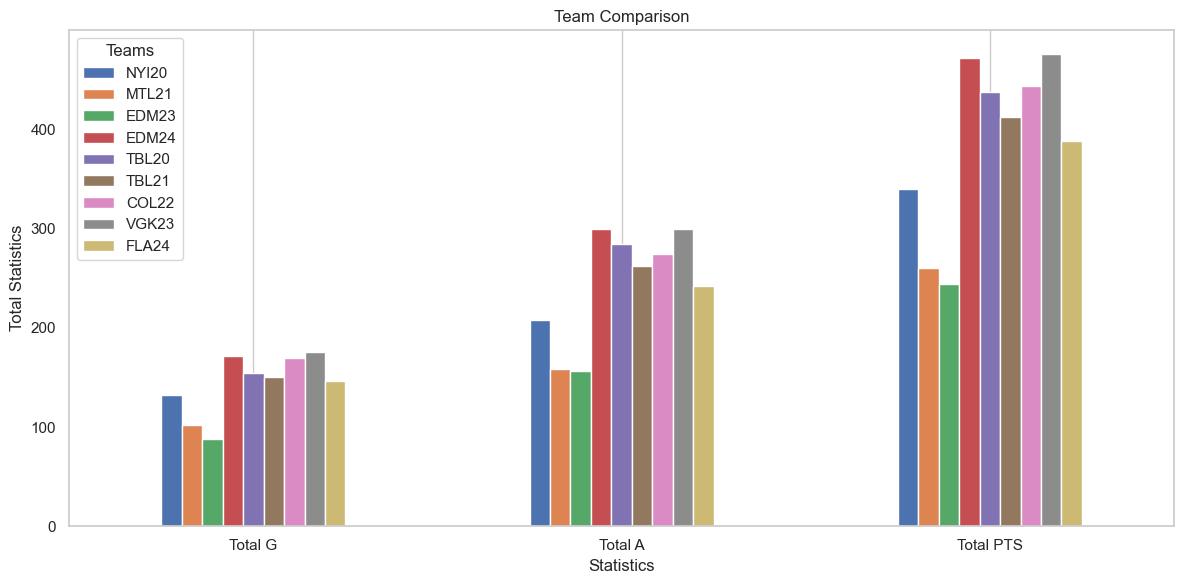

In [60]:
# Combine the two summary dataframes for comparison
combined_summary = pd.concat([summary_df_1, summary_df_2], axis=1)
combined_summary.columns = ['NYI20', 'MTL21', 'EDM23', 'EDM24', 'TBL20', 'TBL21', 'COL22', 'VGK23', 'FLA24']

# Plotting
ax = combined_summary.loc[['Total G', 'Total A', 'Total PTS']].plot(kind='bar', figsize=(12, 6))
plt.title('Team Comparison')
plt.ylabel('Total Statistics')
plt.xlabel('Statistics')
plt.xticks(rotation=0)
plt.legend(title='Teams', loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Axes: >

Text(0.5, 1.0, '2020-2024 Comparison of 3rd Lines: Cup Winners vs Contenders')

Text(0, 0.5, 'Average Values')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'G'), Text(1, 0, 'PTS'), Text(2, 0, 'HIT'), Text(3, 0, 'BLK')])

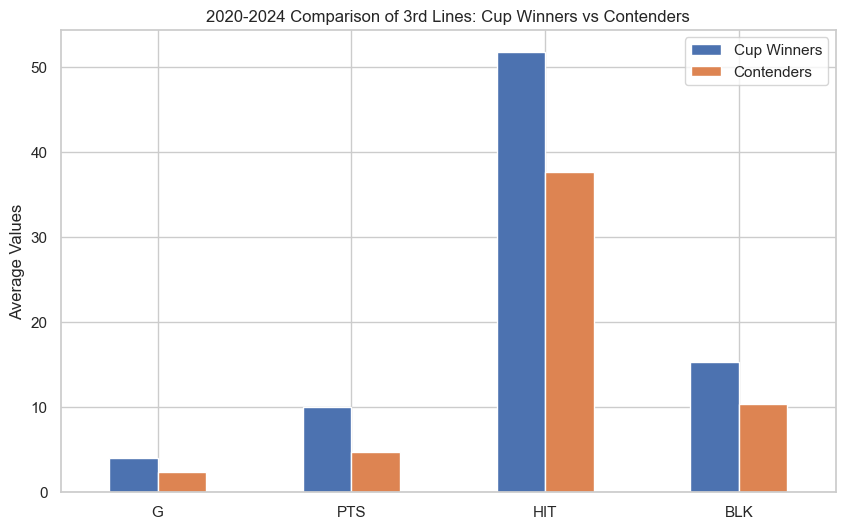

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cup_winners = pd.read_csv('3rdlineplayers.csv')
contenders = pd.read_csv('Contenders3rdline.csv')

team_columns_to_keep = ['Player', 'GP', 'G', 'A', 'PTS', 'TOI', 'HIT', 'BLK']

cup_winners = cup_winners[team_columns_to_keep]
contenders = contenders[team_columns_to_keep]

cup_winners_avg = cup_winners[['G', 'PTS', 'HIT', 'BLK']].mean()
contenders_avg = contenders[['G', 'PTS', 'HIT', 'BLK']].mean()


comparison_df = pd.DataFrame({
    'Cup Winners': cup_winners_avg,
    'Contenders': contenders_avg
})

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('2020-2024 Comparison of 3rd Lines: Cup Winners vs Contenders')
plt.ylabel('Average Values')
plt.xticks(rotation=0) 
plt.show()

In [69]:
import pandas as pd

winners_df = pd.read_csv('winnersadvanced.csv')
contenders_df = pd.read_csv('contendersadvanced.csv')

<Figure size 1200x800 with 0 Axes>

<Axes: >

<Axes: xlabel='Group', ylabel='CF'>

Text(0.5, 1.0, 'CF')

Text(0.5, 0, '')

Text(0, 0.5, 'CF')

<Axes: >

<Axes: xlabel='Group', ylabel='FF'>

Text(0.5, 1.0, 'FF')

Text(0.5, 0, '')

Text(0, 0.5, 'FF')

<Axes: >

<Axes: xlabel='Group', ylabel='CA'>

Text(0.5, 1.0, 'CA')

Text(0.5, 0, '')

Text(0, 0.5, 'CA')

<Axes: >

<Axes: xlabel='Group', ylabel='FA'>

Text(0.5, 1.0, 'FA')

Text(0.5, 0, '')

Text(0, 0.5, 'FA')

<Axes: >

<Axes: xlabel='Group', ylabel='E+/-'>

Text(0.5, 1.0, 'E+/-')

Text(0.5, 0, '')

Text(0, 0.5, 'E+/-')

<Axes: >

<Axes: xlabel='Group', ylabel='TOI/60'>

Text(0.5, 1.0, 'TOI/60')

Text(0.5, 0, '')

Text(0, 0.5, 'TOI/60')

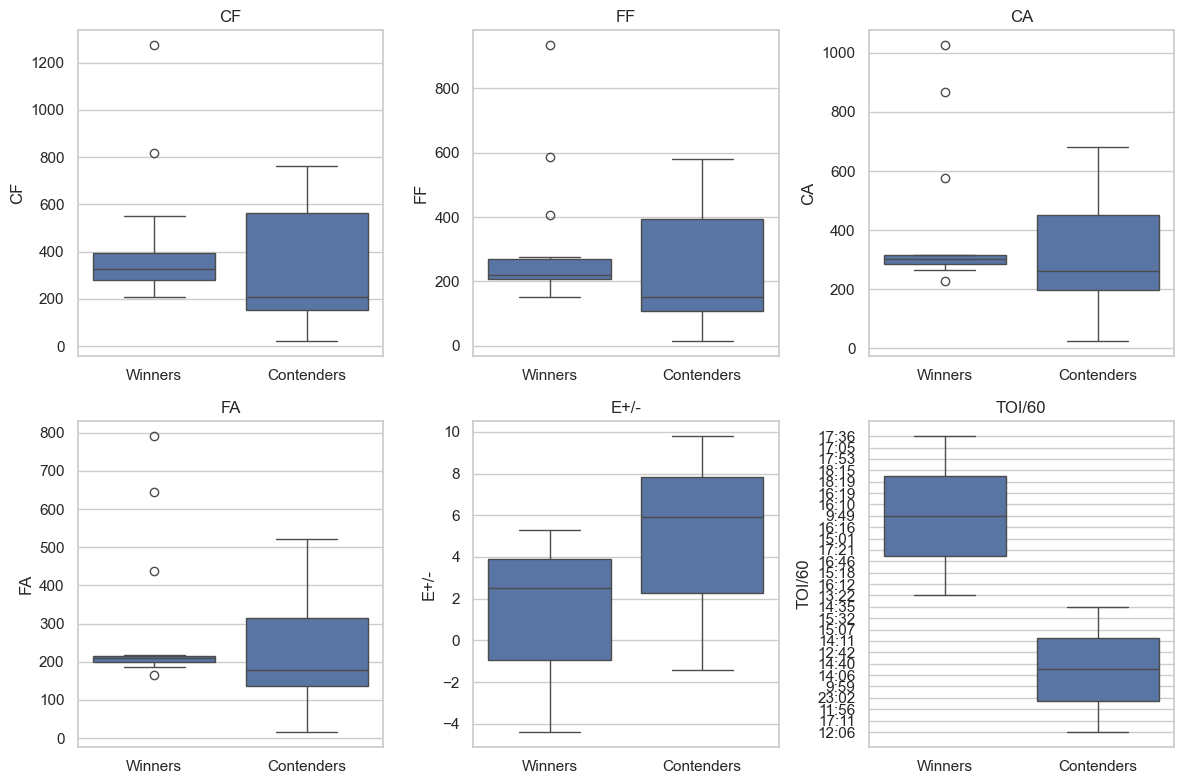

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

winners_df = pd.read_csv('winnersadvanced.csv')
contenders_df = pd.read_csv('contendersadvanced.csv')


winners_df['Group'] = 'Winners'
contenders_df['Group'] = 'Contenders'


combined_df = pd.concat([winners_df, contenders_df], ignore_index=True)
metrics = ['CF', 'FF', 'CA', 'FA', 'E+/-', 'TOI/60']


plt.figure(figsize=(12, 8))


for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Group', y=metric, data=combined_df)
    plt.title(metric)
    plt.xlabel('')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

<Axes: >

Text(0.5, 1.0, '3rd Line Average Takeaways (TK) and Giveaways (GV)')

Text(0, 0.5, 'Average')

(array([0, 1]), [Text(0, 0, 'TK'), Text(1, 0, 'GV')])

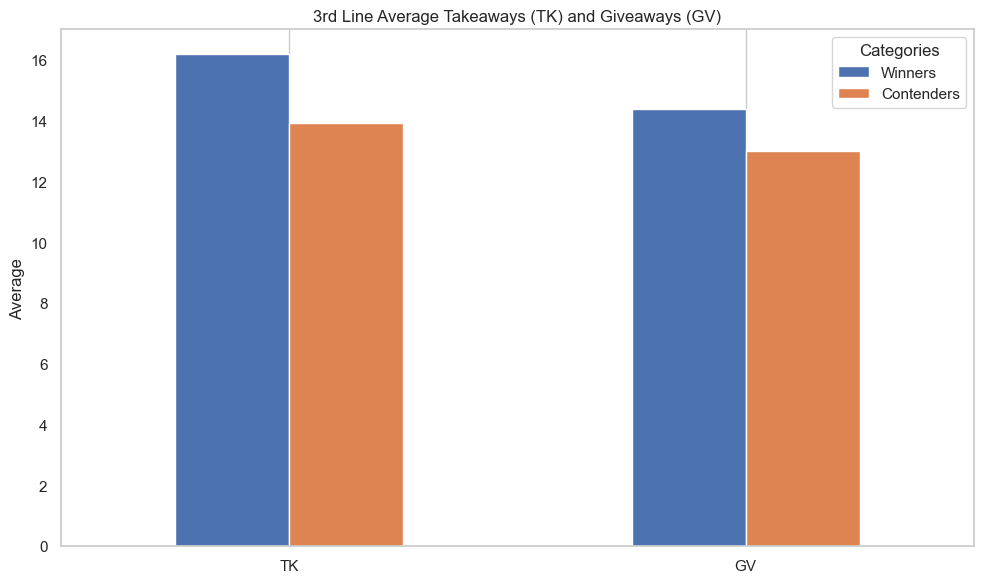

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

winners_df = pd.read_csv('winnersadvanced.csv')
contenders_df = pd.read_csv('contendersadvanced.csv')

winners_avg = {
    'TK': winners_df['TK'].mean(),
    'GV': winners_df['GV'].mean()
}

contenders_avg = {
    'TK': contenders_df['TK'].mean(),
    'GV': contenders_df['GV'].mean()
}

data = {
    'Winners': winners_avg,
    'Contenders': contenders_avg
}

avg_df = pd.DataFrame(data)


avg_df.plot(kind='bar', figsize=(10, 6))

plt.title('3rd Line Average Takeaways (TK) and Giveaways (GV)')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.legend(title='Categories', loc='upper right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()